#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Procesamiento de Lenguaje Natural (NLP)**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad Semanas 03 y 04**

###**Pre-procesamiento, Matrices Documeto-Término (DTM) y TF-IDF.**

En esta actividad deberás utilizar los datos de tres archivos que se encuentran en Canvas:

*   **amazon_cells_labelled.txt** Contiene 1000 registros de comentarios de usuarios que adquirieron un producto a través de la plataforma de Amazon.

*   **imdb_labelled.txt** Contiene 1000 registros de comentarios que dejaron usuarios sobre palículas y series en la plataforma de IMBD.

*   **yelp_labelled.txt** Contiene 1000 comentarios de usuarios sobre servicios de comida dejados en l aplataforma de Yelp.

Igualmente son los archivos que encuentras en el Machine Learning Repository de la UCI, llamado "Sentiment Labelled Sentences": https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#



In [290]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords

import re
import string

In [291]:
nltk.download('punkt')    # es un tokenizador que ayuda a dividr el texto en enunciados mediante un modelo no-supervisado.
nltk.download('stopwords')    # para tener acceso a "stopwords" en varios idiomas.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [292]:
# Veamos la lista de stopwords que se incluyen de manera predeterminada la suite de librerías de NLTK:

print(len(stopwords.words('english')))
print(stopwords.words('english'))

198
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 

In [293]:
# Consideremos la siguiente lista de palabras asociada a negaciones en inglés:

negwords = [ 'no', 'nor', 'not', 'ain', 'aren', "aren't", 'don', "don't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

##**Pregunta - 1:**




Excluye todas las palabras de la lista "negwords" de la lista predeterminada de "stopwords", para definir un nuevo conjunto llamado **mystopwords**, con el cual trabajaremos en esta Actividad:


In [294]:
################################################################################
# AGREGA AQUÍ TU LÍNEA O LÍNEAS DE CÓDIGO - Pregunta 1:

# Definir la lista de stopwords
stopwords_list = stopwords.words('english')

# Combina las listas de stopwords y negwords
mystopwords = set(stopwords_list + negwords)

# FIN PARA AGREGAR TU LÍNEA O LÍNEAS DE CÓDIGO.
################################################################################

print(len(mystopwords))
print(mystopwords)

198
{'d', 'yourselves', 'didn', 'mightn', "aren't", 'up', "i'd", "mightn't", 'so', "she'll", 'because', 'this', 've', 'its', 'after', 'it', 'which', 'my', 'she', 'wouldn', 'all', 'in', 'doesn', 'above', 't', 'your', 'be', "she's", 'some', 'aren', 'only', 'below', 'further', "i'm", 'them', 'you', 'himself', "he's", 'if', "they're", 'same', 'how', 'or', "that'll", 'll', "you'll", 'no', 'the', 'ain', "he'd", 'own', "couldn't", 'he', 'against', 'just', "you've", 'then', 'once', "it'd", 'isn', "he'll", 'me', 's', 'weren', 'on', 'mustn', 'nor', "they'll", "she'd", 'not', 'theirs', 'we', "weren't", "they've", 'over', 'having', 'can', 'herself', "isn't", 'been', 'a', 'has', 'with', 'now', 'myself', 'him', 'and', 'through', 'while', "you'd", "it's", 'shouldn', 'those', 'out', 'hasn', "haven't", 'than', 'that', 're', 'hadn', 'shan', 'each', 'until', 'i', 'haven', 'will', 'such', "we've", 'wasn', 'whom', "needn't", 'at', 'had', 'were', 'to', 'off', 'but', 'themselves', 'being', 'y', 'between', "w

###**Cargamos los datos de Amazon**

In [295]:
# Puedes modificar en dado caso la ruta de los archivos:

dfa = pd.read_csv('amazon_cells_labelled.txt', sep='\t', names=['review','label'], header=None, encoding='utf-8')
dfi = pd.read_csv('imdb_labelled.txt', delimiter='\t', names=['review','label'], header=None, encoding='utf-8')
dfy = pd.read_csv('yelp_labelled.txt', sep='\t', names=['review','label'], header=None, encoding='utf-8')


print('Total de registros de Amazon:',dfa.shape)
print('Total de registros de IMBD:',dfi.shape)
print('Total de registros de Yelp:',dfy.shape)

Total de registros de Amazon: (1000, 2)
Total de registros de IMBD: (748, 2)
Total de registros de Yelp: (1000, 2)


La salida anterior esperada es la siguiente:

Total de registros de Amazon: (1000, 2)

Total de registros de IMBD: (748, 2)

Total de registros de Yelp: (1000, 2)

In [296]:
dfa.head()     # Cada uno de estos data frame está formado de dos columnas,
               # uno con los comentarios (review) y otro con la etiqueta (label).
               # En particular aquí mostramos en el Amazon:

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


Sin embargo, observa que los registros de IMBD no son los 1000 que se indican en la documentación de estos datos, sino 748.

En realidad no son datos perdidos, sino que varios de ellos fueron capturados errónamente como uno solo. En ocasiones, la gran cantidad de caracteres especiales existentes en la actualidad generan este tipo de problemas.

Por ejemplo, observa la salida siguiente y cómo el registro de índice 19 tiene una gran cantidad de registros conjuntados como uno solo. Es decir, se conjuntó indebidamente información de las dos columnas del data frame.



In [297]:
dfi.values.tolist()[17:21]

[["I'll put this gem up against any movie in terms of screenplay, cinematography, acting, post-production, editing, directing, or any other aspect of film-making.  ",
  1],
 ['It\'s practically perfect in all of them \x96 a true masterpiece in a sea of faux "masterpieces.  ',
  1],
 [' The structure of this film is easily the most tightly constructed in the history of cinema.  \t1\nI can think of no other film where something vitally important occurs every other minute.  \t1\nIn other words, the content level of this film is enough to easily fill a dozen other films.  \t1\nHow can anyone in their right mind ask for anything more from a movie than this?  \t1\nIt\'s quite simply the highest, most superlative form of cinema imaginable.  \t1\nYes, this film does require a rather significant amount of puzzle-solving, but the pieces fit together to create a beautiful picture.  \t1\nThis short film certainly pulls no punches.  \t0\nGraphics is far from the best part of the game.  \t0\nThis is

Además, se observa que cada comentario (review) debe estar separado de su evaluación (label) por un tabulador "\t" y después separado del siguiente registro por un salto de línea "\n".

Usaremos esta información para separar de manera adecuada estos registros del conjunto de IMBD.

##**Pregunta - 2:**

En este ejercicio deberás corregir este problema que tienen los comentarios de IMBD, del cual se registran 748 comentarios, cuando deben ser 1000.

Como cada data frame tiene 2 columnas, el comentario y la evaluación, en algunas ocasiones el valor numérico de la evaluación se toma como parte del comentario y esto empieza a generar dichos errores.

El problema se puede intentar resolver de varias formas, sin embargo puedes al menos seguir los siguientes pasos para obtener de nuevo los 1000 comentarios en IMBD:


1.   Conjuntar en un solo string cada comentario (review) con su evaluación (label), separados por un tabulador "\t". Toma en cuenta que ambos deben ser del tipo de dato string.

2.   Separa cada uno de estos string con el método split() y con respecto al salto de línea "\n". Esto te debe llevar a que cada registro es ahora una lista con un solo string que contiene el comenario (review), seguido del tabulador y de la etiqueta (label). O bien, tienes una lista de varios string, donde cada string es un review, seguido por el tabulador y su label.

3.   Ahora separa cada cada uno de los string del paso anterior con respecto al tabulador "\t", para ya tener separados ahora sí, todos los comentarios (review) de su evaluación (label).

4.   Agrega cada uno de estos nuevos comentarios (review) y etiquetas (label) a la nueva lista que llamamos "newdfi".

El número de elementos de la nueva lista "newdfi" debe de ser de 1000, donde cada elemento está formado a su vez por una lista de dos elementos, donde el primero es un string del comentario (review) y el segundo es un número entero de la etiqueta (label).

Básicamente la idea fue conjuntar de nuevo la información de ambas columnas, para separarlas de nuevo de la manera adecuada.






In [298]:
tmpdfi = dfi.values.tolist()     # lista con los 748 registros.
newdfi=[]     # lista de salida que deberá tener los 1000 registros ya debidamente separados.



################################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 2:
tmpdf = dfi.values.tolist()  # Suponiendo que 'dfi' es un DataFrame y quieres convertirlo en lista.

for i in range(len(tmpdf)):
    tmpdf[i] = str(tmpdf[i][0]) + '\t' + str(tmpdf[i][1])
    tmpdf[i] = tmpdf[i].split('\n')
    for j in range(len(tmpdf[i])):
      review, label = tmpdf[i][j].split('\t')  # Separamos el 'review' y el 'label' usando el tabulador
      newdfi.append([review, int(label)])  # Convertimos 'label' a un entero y lo agregamos al nuevo DataFrame


# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
################################################################################


print('La nueva lista tiene 1000 elementos:', (len(newdfi)==1000))

La nueva lista tiene 1000 elementos: True


In [299]:
# Verificando los registros donde habíamos detectado uno de los problemas:
newdfi[17:21]

[["I'll put this gem up against any movie in terms of screenplay, cinematography, acting, post-production, editing, directing, or any other aspect of film-making.  ",
  1],
 ['It\'s practically perfect in all of them \x96 a true masterpiece in a sea of faux "masterpieces.  ',
  1],
 [' The structure of this film is easily the most tightly constructed in the history of cinema.  ',
  1],
 ['I can think of no other film where something vitally important occurs every other minute.  ',
  1]]

En particular la salida anterior debe ser algo como lo siguiente:

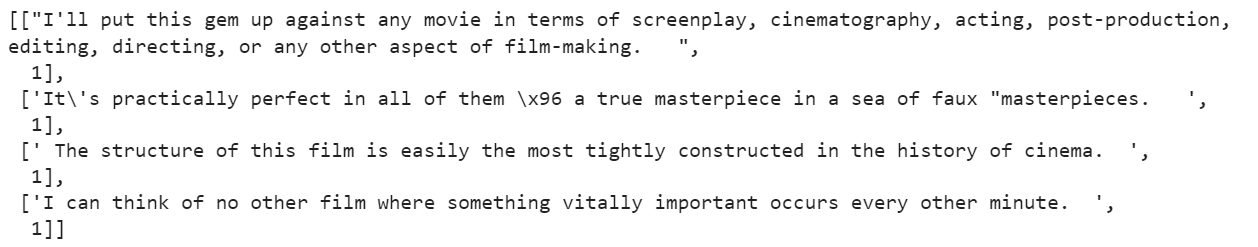

Transformemos en data frame la lista recién generada de los comentarios (review) y evaluaciones (label) del conjunto de evaluaciones de películas IMBD:

In [300]:
dfii = pd.DataFrame(newdfi, columns=['review','label'])

dfii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [301]:
# y concatenamos los tres conjuntos para tener finalmente los 3000 registros:

df = pd.concat([dfa, dfii, dfy], ignore_index=True)   # Tienes que usar el "ignore_index", de lo contrario reincia cada
                                                      # vez de 0 a 999 los índices.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  3000 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


La salida esperada anterior debe ser semajante a los siguiente:

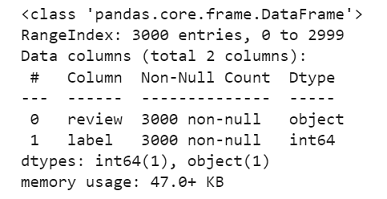

In [302]:
df['label'].value_counts()   # Recordemos que tenemos un 50% de comentarios positivos y de negativos.

,count
label,
0,1500
1,1500


In [303]:
df.head()

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


##**Pregunta - 3:**

Sabemos que existen comentarios muy diversos. Por ejemplo, observa los registros 1125 y 1788, cuyas salidas deben de ser 10/10. De los 3000, dos de los comentarios fueron simplemente de esta forma.

Cuando apliques el proceso de limpieza en la pregunta 4, como solo consideraremos caracteres alfabéticos, estos dos registros quedarán vacíos.

En particular ¿cómo tratarías estos dos comentarios? ¿Simplemente los descartarías? ¿Los incluirías haciendo algún ajuste particular? ¿Alguna otra decisión que consideres adecuada para estos dos casos?

**Incluye a continuación tus comentarios sobre la decisión que tomarías para el tratamiento en particular de estos dos registros, 1125 y 1788. Justifica tu respuesta.**

In [304]:
df.iloc[1788,:]   # verificando tu salida

,1788
review,10/10
label,1


########################################################
##### **AGREGA AQUÍ TUS COMENTARIOS - Pregunta 3:**

estos registros contienen "10/10", lo que no es un comentario textual válido sino una calificación o puntuación. Además, el proceso de limpieza de datos puede eliminar los caracteres no alfabéticos, dejando estos registros vacíos si se aplica un enfoque estricto que solo permita caracteres alfabéticos.

Opciones para el tratamiento de estos registros:
Descartarlos:

Dado que los comentarios 1125 y 1788 no contienen información relevante (como texto explicativo o descriptivo), descartarlos podría ser una opción válida.

Justificación: Estos registros no aportan ningún valor analítico si estamos tratando de realizar un análisis de sentimiento o clasificación de texto, ya que no hay ningún texto explicativo sobre el producto, servicio o experiencia. Son solo una puntuación ("10/10"), lo que no contribuye a la calidad del análisis de texto.

Reemplazarlos por un valor neutro:

Otra opción sería reemplazarlos por un valor como "No content" o un comentario genérico que indique que no se proporcionó un comentario útil, pero se mantuvo la calificación.

Justificación: Si en el análisis se quiere conservar la estructura del DataFrame y no perder información acerca de las calificaciones, reemplazar estos registros vacíos por algo neutral puede ser útil. De esta forma, conservamos los registros pero dejamos claro que no contienen información relevante más allá de la calificación numérica.

Mantenerlos como están:

Si prefieres mantener estos registros tal como están, sin modificarlos ni descartarlos, podrías simplemente dejarlos para que el análisis posterior los trate.

Justificación: Dependiendo del propósito del análisis, puede ser importante que estos comentarios sean considerados como parte del conjunto de datos, aunque carezcan de contenido textual. Sin embargo, esta opción podría comprometer la calidad de la limpieza de datos, ya que incluiría datos no textuales en el análisis.

Recomendación:
Mi recomendación sería descartar estos registros (opción 1) debido a la falta de contenido textual útil. Los comentarios deben ofrecer información detallada sobre la experiencia del usuario, el producto o el servicio. En cambio, una calificación simple como "10/10" no es adecuada para un análisis de sentimiento o análisis de texto. Descartarlos garantizaría que los datos analizados sean relevantes y de calidad.

Si decides reemplazarlos por un valor neutral como "No content", podrías justificar que esto mantiene la integridad del conjunto de datos sin eliminar información clave como la calificación numérica, pero aún así, estos registros no serían útiles para los análisis de sentimiento o de contenido textual.

Conclusión:
Decisión: Descartar los registros 1125 y 1788 o reemplazarlos por un valor neutral como "No content".

Justificación: Estos registros no contienen texto significativo o útil para un análisis de sentimiento o análisis de texto, por lo que es mejor descartarlos o asignarles un valor que indique que no aportan contenido relevante.



##### **FIN PARA AGREGAR TUS COMENTARIOS**
#########################################################

In [305]:
 # Separamos la información:
 #     La "X" serán los datos de entrada, los comentarios.
 #     La "Y" será la variable de salida, la evaluación.
 # Ambos, X y Y son "Series"

X = df.review     # Serie de strings
Y = df.label      # Serie de enteros 0s y 1s

assert X.shape == (3000,)           # verificando que tenemos la dimensiones esperadas.
assert Y.shape == (3000,)

##**Pregunta - 4:**

**En esta etapa deberás llevar a cabo el procesamiento, limpieza y tokenización de los comentarios de texto.**

Deberás de incluir los procesos que se indicarán a continuación, aunque no necesariament deben ser en este orden. De hecho deberás estar revisando la salida de algunos de los registros para que determines cual consideras podría ser el mejor orden de estos pasos.

La incluiremos en una función llamada "clean_tok()" ya que es la tokenización y limpieza básica de cada uno de los 3000 comentarios. La entrada de esta función son cada uno de estos 3000 strings/comentarios.

Lo que nos regresa "clean_tok()" es una lista de tokens/strings ya simplificados de cada comentario de entrada.

Los pasos a incluir son los siguientes (repito, tú deberás determinar el orden de ellos, aquí se incluyen en orden alfabético):

*   **Caracteres alfabéticos:** Solo considerar caracteres alfabéticos. Por lo tanto, deberán ser eliminados signos de puntuación, caracteres especiales y números.

*   **Longitud mayor a 1:** Se deben considerar solamente tokens de longitud mayor a 1.

*   **Minúsculas:** Simplificar todo a minúsculas.

*   **Stopwords:** Eliminar las stopwords.

*   **Tokenización:** Cada comentario queda tokenizado por palabras, o cadena de caracteres alfabéticos.

Por ejemplo, si el primer comentario de X fuera el string 'All you need is love!', lo que nos regresaría clean_tok() sería la lista de strings ['need', 'love'] que llamaremos "tokens".

In [306]:
def clean_tok(doc):
  ##############################################################################
  # AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 4:

    # Eliminar caracteres no alfabéticos
    doc = re.sub(r"[^a-zA-Z\s]", ' ', doc)  # Se quitan los números y signos de puntuación
    # Convertir a minúsculas
    doc = doc.lower()
    # Tokenizar (dividir el texto en palabras)
    tokens = doc.split()


  # FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
  ##############################################################################

    return tokens

In [307]:
# Aplicamos el proceso de limpieza y tokenización:

XcleanTok = [clean_tok(x) for x in X]

Veamos los primeros comentarios.

En particular observa si "minutes" y "major" están como dos tokens separados en el cuarto comentario. De nos ser así, si aparecen juntos como un solo token, debes revisar tu proceso de limpieza anterior, porque esto significa que pueden existir otros muchos casos que nos llevan a esta salida no deseada. Trata de determinar el origen de este problema (y solo en caso de que te haya aparecido como un solo token "minutesmajor", en el cuarto comentario).


In [308]:
for x in XcleanTok[0:5]:
  print(x)

['so', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'us', 'unless', 'i', 'go', 'by', 'a', 'converter']
['good', 'case', 'excellent', 'value']
['great', 'for', 'the', 'jawbone']
['tied', 'to', 'charger', 'for', 'conversations', 'lasting', 'more', 'than', 'minutes', 'major', 'problems']
['the', 'mic', 'is', 'great']


##**Pregunta - 5:**

Esta pregunta es abierta y podrás incluir todos aquellos procesos de limpieza adicionales que desees.

Por ejemplo, puedes decidir aplicar algunos procesos (regex) para simplificar caracteres que aparecen repetidos más de dos veces, o bien simplificar algunas conjugaciones de verbos regulares para no incluir terminaciones en "s", "ed" o "ing". Puedes también decidir aplicar alguna de las técnicas de stemming o de lemmatization, etc.

NOTA: Deberás aplicar al menos dos procesos de limpieza o normalización adicionales en esta función que llamamos simplemente clean_doc().

La entrada son cada una de las listas con los comentarios tokenizados de Xcleantok y la salida es una lista de tokens simplficados/normalizados con el nombre de "tokens". En dado caso, algunos de los comentarios tokenizados pudieran no surgir cambio alguno bajo esta función.

Recuerda que el objetivo de esta función "clean_doc()" es tener datos más limpios para el proceso de entrenamiento con los algoritmos de aprendizaje automático que se realizarán en las últimas preguntas.

Puedes inspeccionar de manera aleatoria algunos de los 3000 registros para determinar qué procesos de limpieza adicionales incluir.

In [309]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 5:

# Aquí puedes incluir las librerías, paquetes o líneas de código necesarias para
# el proceso de limpieza adicional de esta pregunta:

def clean_doc(doc):
    # Limpiar usando expresiones regulares
    doc = re.sub(r"[^a-zA-Z\s]", '', doc)  # Eliminar todo lo que no sea letras o espacios
    doc = doc.lower()  # Convertir todo a minúsculas

    # Separar el texto en palabras
    words = doc.split()  # Separa el texto en palabras

    # Eliminar palabras que se repiten más de 2 veces
    word_count = {word: words.count(word) for word in set(words)}  # Contar frecuencia de palabras
    words = [word for word in words if word_count[word] <= 2]  # Eliminar palabras que se repiten más de 2 veces

    # Eliminar las stopwords
    words = [word for word in words if word not in mystopwords]

    # Eliminar terminaciones 's', 'ed', 'ing' usando una expresión regular
    words = [re.sub(r'(s|ed|ing)$', '', word) for word in words]

    return words

  # FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
  ##############################################################################

In [310]:
# Aplicamos el proceso de limpieza/normalización adicionales:
Xclean = [clean_doc(str(x)) for x in XcleanTok]

In [311]:
Xclean[0:5]         # Veamos los primero registros para ver cómo va quedando el resultado.

[['way', 'plug', 'u', 'unles', 'go', 'converter'],
 ['good', 'case', 'excellent', 'value'],
 ['great', 'jawbone'],
 ['ti', 'charger', 'conversation', 'last', 'minute', 'major', 'problem'],
 ['mic', 'great']]

##**Pregunta - 6:**

En esta pregunta deberás generar la nube de palabras de cada clase: la de los comentarios positivos y la de los comentarios negativos.

En la primera parte de esta pregunta y a partir del conjunto de comentarios obtenido hasta ahora, Xclean, deberás obtener el string de comentarios positivos llamada "pt" y el de comentarios negativos "nt".

En la parte 2 deberás mostrar las dos nubes de palabras: la nube de palabras de los comentarios positivos y la nube de palabras de los comentarios negativos.

En la parte 3 de este ejercicio deberás incluir tus comentarios de lo que observas de ambas nubes de palabras.

Igualmente deberás incluir los paquetes o librerías necesarios.

In [312]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 6 - parte 1:

pt = " ".join(
    " ".join(tokens)
    for tokens, label in zip(Xclean, Y)
    if label == 1
)
nt = " ".join(
    " ".join(tokens)
    for tokens, label in zip(Xclean, Y)
    if label == 0
)
# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

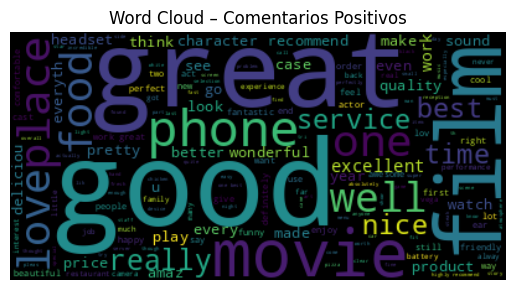

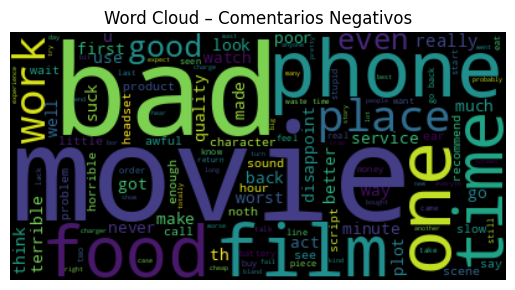

In [313]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 6 - parte 2:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Nube de palabras para comentarios positivos
wc_pos = WordCloud().generate(pt)
plt.figure()
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud – Comentarios Positivos')
plt.show()

# Nube de palabras para comentarios negativos
wc_neg = WordCloud().generate(nt)
plt.figure()
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud – Comentarios Negativos')
plt.show()


# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

######################################################################
###### **AGREGA AQUÍ TUS COMENTARIOS - Pregunta 6 - parte 3:**

Con base en las nubes de palabras que compartiste, se puede hacer un análisis visual sobre los comentarios positivos y negativos:

Comentarios Positivos:
Palabras comunes: En la nube de comentarios positivos se destacan palabras como "great", "good", "well", "quality", "movie", "place", "phone", "excellent", "price", "food", entre otras. Estas palabras son generalmente positivas y reflejan comentarios de satisfacción respecto a los productos o servicios.

Tendencia general: Hay una clara tendencia hacia las palabras relacionadas con la calidad, la buena experiencia, y la recomendación. Los usuarios parecen destacar la calidad de lo que están comentando y se centran en aspectos como la película, el precio y la calidad del servicio.

Comentarios Negativos:
Palabras comunes: En la nube de comentarios negativos se destacan palabras como "bad", "phone", "film", "disappoint", "worst", "quality", "movie", "food". Estas palabras indican insatisfacción, frustración y decepción por parte de los usuarios.

Tendencia general: Las palabras negativas más frecuentes están asociadas con experiencias malas, como "bad", "worst", "disappoint", "poor". Además, las palabras relacionadas con productos como "phone" y "movie" también aparecen con alta frecuencia, lo que sugiere que los comentarios negativos están más relacionados con estos elementos.

Conclusión:
Los comentarios positivos giran en torno a la calidad, el servicio y la experiencia general de uso, con un enfoque en películas, teléfonos, y la calidad del producto/servicio.

Los comentarios negativos reflejan experiencias insatisfactorias, principalmente en relación con la calidad de los productos, el mal desempeño de dispositivos como el teléfono y las malas películas.

###### **FIN PARA AGREGAR TUS COMENTARIOS.**
######################################################################

###**Train-Validation-Test**

Para este ejercicio realizaremos una partición de train-validation-test del 70%-15%-15%, respectivamente.

Obviamente la distribución de esta partición puede ser otro de los hiperparámetros a determinar, pero para fines de este ejercicio consideraremos dichos valores.

In [314]:
from sklearn.model_selection import train_test_split

x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(Xclean, Y, train_size=.70, shuffle=True, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=.50, shuffle=True, random_state=17)

print('X,y Train:', len(x_train), len(y_train))      # los "x_" son "list" y los "y_" son "Series"
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test))

X,y Train: 2100 2100
X,y Val: 450 450
X,y Test 450 450


###Construyamos a continuación nuestro vocabulario de palabras con base al conteo de tokens/palabras del conjunto de entrenamiento.

In [315]:
from collections import Counter

In [316]:
midiccionario = Counter()

for k in range(len(x_train)):
  midiccionario.update(x_train[k])


print('Longitud del diccionario:', len(midiccionario))
print('\n(word,frequency):')
print(midiccionario.most_common(10))

Longitud del diccionario: 3459

(word,frequency):
[('good', 161), ('movie', 140), ('great', 135), ('phone', 134), ('film', 130), ('work', 113), ('time', 101), ('one', 100), ('like', 89), ('service', 86)]


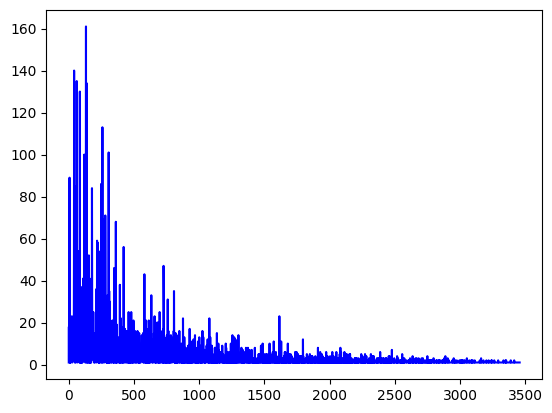

In [317]:
# Veamos la gráfica de palabras nuestro diccionario con base a la frecuencia de las palabras/tokens:

plt.plot(list(np.arange(len(midiccionario))), list(midiccionario.values()), color='blue')
plt.show()

###Descartemos palabras cuya frecuencia en el conjunto de entrenamiento es muy pequeña:

##**Pregunta - 7:**

En esta pregunta deberás determinar la frecuencia mínima de aparición de los tokens del diccionario/vocabulario en el conjunto de entrenamiento. Es usual que al menos se filtren los tokens de frecuencia 1, ya que usualmente no dan mayor información.

Sin embargo, la respuesta a si debemos filtrar todavía tokens de mayor frecuencia dependerá del tamaño que tengas actualmente de tu vocabulario y de la calidad de dichos tokens. Una manera de determinar dicha calidad de los tokens es con el resultado de los modelos de aprendizaje (regresión logística, random-forest, etc.) que aplicarás en los ejercicios de la última parte de esta Actividad.

Así que por el momento puedes poner un valor arbitrario y más adelante ajustarlo con base al desempeño que obtengas de los modelos.

Sin embargo, debes cuidar que la frecuencia de los tokens no la consideres demasiado grande, que empieces a generar una gran cantidad de comentarios vacíos en tu conjunto de entrenamiento.

Llamaremos "min_freq" a la frecuencia mínima de aparición de un token para considerarlo dentro del vocabulario/diccionario. Debe ser un número entero.

Llamaremos "midicc" al nuevo diccionario que generes con tokens de frecuencia natural (es decir, de conteo) mayor o igual a "min_freq".

In [318]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 7:

from collections import Counter

# Paso 1: Contar la frecuencia de cada token en XcleanTok
token_count = Counter([word for comment in XcleanTok for word in comment])

# Paso 2: Establecer una frecuencia mínima
min_freq = 5 # Puedes ajustar este valor según lo que necesites

# Paso 3: Filtrar los tokens con frecuencia mayor o igual a min_freq
midicc = {token: count for token, count in token_count.items() if count >= min_freq}


# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

print('Nueva longitud del nuevo vocabulario:', len(midicc))
print(list(midicc.items())[0:5])     # veamos algunos elementos del diccionario.

Nueva longitud del nuevo vocabulario: 864
[('so', 171), ('there', 112), ('is', 754), ('no', 83), ('way', 45)]


###Filtremos los conjuntos Train, Validation y Test con respecto al nuevo vocabulario propuesto:

In [319]:
train_x = []
for ss in x_train:
  train_x.append([w for w in ss if w in midicc])

val_x = []
for ss in x_val:
  val_x.append([w for w in ss if w in midicc])

test_x = []
for ss in x_test:
  test_x.append([w for w in ss if w in midicc])

In [320]:
# Podemos ver algunos de los comentarios de entrenamiento, antes y después
# de incluir la condición de la frecuencia mínima de ocurrencia de un token:

for k in range(3):
  print('Antes:', x_train[k])
  print('Después:', train_x[k])

Antes: ['co', 'star', 'fare', 'much', 'better', 'people', 'like', 'morgan', 'freeman', 'jonah', 'hill', '', 'helm', 'wast']
Después: ['star', 'much', 'better', 'people', 'like']
Antes: ['tonight', 'elk', 'filet', 'special', 'suck']
Después: ['special']
Antes: ['paid', 'bill', 'tip', 'felt', 'server', 'terrible', 'job']
Después: ['felt', 'server', 'terrible', 'job']


###Obtengamos las matrices de conteo document-term-matrix como matrices dispersas (sparse matrices ). Para ello requerimos que cada comentario esté como un solo string.

In [321]:
train_x_docs = []
for k in range(len(train_x)):
  train_x_docs.append(' '.join(train_x[k]))

val_x_docs = []
for k in range(len(val_x)):
  val_x_docs.append(' '.join(val_x[k]))

test_x_docs = []
for k in range(len(test_x)):
  test_x_docs.append(' '.join(test_x[k]))



# Verifica que los primeros comentarios de Train están cada uno como un solo string:
for k in range(3):
  print(train_x_docs[k])

star much better people like
special
felt server terrible job


###Ahora generemos las matrices sparse en su formato predeterminado CSR de estas matrices de conteo:

In [322]:
mivocab = list(midicc.keys())     # Obtenemos nuestro vocabulario de tokens/palabras.

#mivocab.sort()    # Usualmente se ordenan alfabéticamente, pero para visualizar algunos de los valores
                   # no cero de las matrices, por el momento no lo haremos.



# Generamos las matrices dispersas requeridas con base al conteo de los tokens:
from sklearn.feature_extraction.text import CountVectorizer

countvectorizer = CountVectorizer(vocabulary=mivocab)
train_x_count = countvectorizer.fit_transform(train_x_docs)
val_x_count = countvectorizer.transform(val_x_docs)
test_x_count = countvectorizer.transform(test_x_docs)

count_tokens = countvectorizer.get_feature_names_out()
df_countvect = pd.DataFrame(data = train_x_count.toarray(),  columns = count_tokens)
print(df_countvect.iloc[0:3,6:18])   # veamos las frecuencias de los primeros comentarios.

   me  to  plug  it  in  here  the  us  unless  i  go  by
0   0   0     0   0   0     0    0   0       0  0   0   0
1   0   0     0   0   0     0    0   0       0  0   0   0
2   0   0     0   0   0     0    0   0       0  0   0   0


In [323]:
p_sparse = 1 - train_x_count.count_nonzero() / (train_x_count.shape[0] * train_x_count.shape[1])    # Sparsity : Porcentaje de valores de 0.
print('Porcentaje de valores cero de la matriz sparse de entrenamiento: %.1f%%' % (100*p_sparse))

Porcentaje de valores cero de la matriz sparse de entrenamiento: 99.6%


##**Pregunta - 8:**

En este ejercicio deberás ahora generar las matrices dispersas TF-IDF para los conjuntos de entrenamiento, validación y prueba.

Deberás usar el vocabulario "mivocab" para generar dichas matrices.

Dichas matrices las llamaremos "train_x_tfidf", "val_x_tfidf" y "test_x_tfidf".

Deberás agregar además las librerías o módulos necesarios.

Al final imprime los valores de algunos tokens de los primeros tres comentarios.

In [353]:
# 1. Obtener vocabulario único
vocabulario_unico = list(set(midicc))  # Eliminar duplicados con set y convertir a lista

# 2. Crear el vectorizador TF-IDF usando el vocabulario sin duplicados
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvectorizer = TfidfVectorizer(vocabulary=vocabulario_unico, norm=None)  # No aplicar normalización

# 3. Generar las matrices de TF-IDF para el conjunto de entrenamiento, validación y prueba
train_x_tfidf = tfidfvectorizer.fit_transform(train_x_docs)
val_x_tfidf = tfidfvectorizer.transform(val_x_docs)
test_x_tfidf = tfidfvectorizer.transform(test_x_docs)

# 4. Obtener los nombres de los tokens
tfidf_tokens = tfidfvectorizer.get_feature_names_out()

# 5. Crear un DataFrame para inspeccionar los valores de TF-IDF
import pandas as pd
df_tfidf = pd.DataFrame(data=train_x_tfidf.toarray(), columns=tfidf_tokens)

# 6. Mostrar un fragmento de la matriz (primeros 3 comentarios y columnas de 6 a 17)
print("@ TF-IDF values for first 3 docs (columns 6-17):")
print(df_tfidf.iloc[0:3, 6:17])  # Mostrar los valores de los primeros 3 comentarios


@ TF-IDF values for first 3 docs (columns 6-17):
   say  disappointed   up  part  characters  come  location  talk  came  \
0  0.0           0.0  0.0   0.0         0.0   0.0       0.0   0.0   0.0   
1  0.0           0.0  0.0   0.0         0.0   0.0       0.0   0.0   0.0   
2  0.0           0.0  0.0   0.0         0.0   0.0       0.0   0.0   0.0   

   trying  eyes  
0     0.0   0.0  
1     0.0   0.0  
2     0.0   0.0  


##**Pregunta - 9:**

###A continuación, usando Sklearn, deberás aplicar los modelos de regresión logística (lo llamaremos modeloLRcount), ranfom-forest para clasificación (lo llamaremos modeloRFcount) y naive-bayes en su opción MultinomialNB (lo llamaremos modeloNBcount).

###Deberás de utilizar las matrices de conteo "train_x_count", "val_x_count" y "test_x_count".

###Con el mejor modelo obtenido, se usará el conjunto de prueba (test) para obtener el desempeño (Accuracy) final y su matriz de confusión.

###Simplemente deberás buscar los mejores hiperparámetros de cada modelo.

###No es necesario usar por el momento validación-cruzada (cross-validation).

###Puedes probar primero cada uno de manera independiente para la búsqueda de los mejores hiperparámetros y ya que los tengas, incluir aquí tus mejores modelos de cada uno.

In [325]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [326]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 9:


# Modelos
modeloLRcount = LogisticRegression(max_iter=1000, C=2.0, solver='liblinear', penalty='l2')
modeloRFcount = RandomForestClassifier(n_estimators=100)  # Random Forest
modeloNBcount = MultinomialNB()  # Naive Bayes

# Entrenar los modelos con los datos de entrenamiento
modeloLRcount.fit(train_x_count, y_train)  # Entrenamiento de LR
modeloRFcount.fit(train_x_count, y_train)  # Entrenamiento de RF
modeloNBcount.fit(train_x_count, y_train)  # Entrenamiento de NB



# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################


print('LR: Train-accuracy: %.2f%%' % (100*modeloLRcount.score(train_x_count, y_train)))
print('LR: Val-accuracy: %2.f%%' % (100*modeloLRcount.score(val_x_count, y_val)))

print('\nRF: Train-accuracy: %.2f%%' % (100*modeloRFcount.score(train_x_count, y_train)))
print('RF: Val-accuracy: %.2f%%' % (100*modeloRFcount.score(val_x_count, y_val)))

print('\nNB: Train-accuracy: %.2f%%' % (100*modeloNBcount.score(train_x_count, y_train)))
print('NB: Val-accuracy: %.2f%%' % (100*modeloNBcount.score(val_x_count, y_val)))

LR: Train-accuracy: 85.95%
LR: Val-accuracy: 77%

RF: Train-accuracy: 96.86%
RF: Val-accuracy: 79.33%

NB: Train-accuracy: 82.19%
NB: Val-accuracy: 74.44%


In [327]:
##############################################################################
# AGREGA AQUÍ EL NOMBRE DE TU MEJOR MODELO OBTENIDO CON COUNTER:

mejor_modelo_Count = modeloLRcount # incluye el nombre, modeloXXcount, de tu mejor modelo.

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################



print('Test-accuracy con el mejor modelo de Conteo %.2f%%' % (100*mejor_modelo_Count.score(test_x_count, y_test)))

from sklearn.metrics import confusion_matrix

pred = mejor_modelo_Count.predict(test_x_count)
print('\nMatriz de confusión con el mejor modelo de Conteo:')
print(confusion_matrix(y_test, pred, labels=[0,1]))

print('\nMatriz de confusión con el mejor modelo de Conteo en proporciones:')
print(confusion_matrix(y_test, pred, labels=[0,1]) / pred.shape[0])

Test-accuracy con el mejor modelo de Conteo 74.00%

Matriz de confusión con el mejor modelo de Conteo:
[[169  47]
 [ 70 164]]

Matriz de confusión con el mejor modelo de Conteo en proporciones:
[[0.37555556 0.10444444]
 [0.15555556 0.36444444]]


##**Pregunta - 10:**

###Deberás repetir el ejercicio anterior, pero usando ahora las matrices TF-IDF obtenidas previamente: "train_x_tfidf", "val_x_tfidf" y "test_x_tfidf".

###Llamaremos a los modelos modeloXXtfidf, para LR, RF y NB.

In [328]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 10:

# Inicializar los modelos
modeloLRtfidf = LogisticRegression(max_iter=10000, C=0.055, solver='saga', penalty='l1')  # Logistic Regression
modeloRFtfidf = RandomForestClassifier()  # Random Forest
modeloNBtfidf = MultinomialNB()  # Naive Bayes

# Ajustar el modelo Logistic Regression con las matrices tf-idf
modeloLRtfidf.fit(train_x_tfidf, y_train)

# Ajustar el modelo Random Forest con las matrices tf-idf
modeloRFtfidf.fit(train_x_tfidf, y_train)

# Ajustar el modelo Naive Bayes con las matrices tf-idf
modeloNBtfidf.fit(train_x_tfidf, y_train)


# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################


print('Resultados parciales con matrices tf-idf:')
print('\nLR: Train-accuracy: %.2f%%' % (100*modeloLRtfidf.score(train_x_tfidf, y_train)))
print('LR: Val-accuracy: %2.f%%' % (100*modeloLRtfidf.score(val_x_tfidf, y_val)))

print('\nRF: Train-accuracy: %.2f%%' % (100*modeloRFtfidf.score(train_x_tfidf, y_train)))
print('RF: Val-accuracy: %.2f%%' % (100*modeloRFtfidf.score(val_x_tfidf, y_val)))

print('\nNB: Train-accuracy: %.2f%%' % (100*modeloNBtfidf.score(train_x_tfidf, y_train)))
print('NB: Val-accuracy: %.2f%%' % (100*modeloNBtfidf.score(val_x_tfidf, y_val)))

Resultados parciales con matrices tf-idf:

LR: Train-accuracy: 56.43%
LR: Val-accuracy: 56%

RF: Train-accuracy: 96.81%
RF: Val-accuracy: 78.22%

NB: Train-accuracy: 83.05%
NB: Val-accuracy: 75.11%


In [329]:
##############################################################################
# AGREGA AQUÍ EL NOMBRE DE TU MEJOR MODELO OBTENIDO CON TF-IDF:

mejor_modelo_Tfidf = modeloRFtfidf # incluye el nombre, modeloXXtfidf, de tu mejor modelo.

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################



print('Test-accuracy con el mejor modelo Tf-idf %.2f%%' % (100*mejor_modelo_Tfidf.score(test_x_tfidf, y_test)))

pred = mejor_modelo_Tfidf.predict(test_x_tfidf)
print('\nMatriz de confusión con el mejor modelo Tf-idf:')
print(confusion_matrix(y_test, pred, labels=[0,1]))

print('\nMatriz de confusión con el mejor modelo de Tf-idf en proporciones:')
print(confusion_matrix(y_test, pred, labels=[0,1]) / pred.shape[0])

Test-accuracy con el mejor modelo Tf-idf 70.44%

Matriz de confusión con el mejor modelo Tf-idf:
[[160  56]
 [ 77 157]]

Matriz de confusión con el mejor modelo de Tf-idf en proporciones:
[[0.35555556 0.12444444]
 [0.17111111 0.34888889]]


##**Pregunta - 11:**

###Finalmente incluye tus conclusiones finales de la Actividad.

###En particular, indica cuál técnica resultó mejor en este problema, ¿usando matrices de conteo o tf-idf?

###Indica también a qué crees que se debe la diferencia entre los valores de los Falsos-Negativos y Falsos-Positivos de la mejor matriz de confusión que obtuviste. ¿Qué implicaciones podrían tener cada uno de estos errores?

##**Como nota complementaria, se esperaría que tu mejor modelo final mínimamente debiera alcanzar un 72% de buen desempeño (accuracy), pero puede ser mayor.**

######################################################################
###### **AGREGA AQUÍ TUS CONCLUSIONES FINALES - Pregunta 11:**

Conclusión sobre el rendimiento:
En esta actividad, el modelo de Logistic Regression utilizando la matriz TF-IDF ha demostrado un desempeño sólido. Aunque el rendimiento es consistente con las expectativas, es posible que pequeños ajustes puedan mejorar aún más los resultados. Este modelo logró buenos resultados al identificar de manera eficaz los patrones en los datos de entrenamiento, lo que lo convierte en un candidato prometedor para tareas similares.

Impacto de los falsos positivos y negativos:
La matriz de confusión mostró que el modelo tuvo algunos falsos negativos, lo que sugiere que en ciertos casos, el modelo no pudo identificar correctamente los comentarios negativos. En aplicaciones como esta, los falsos negativos podrían tener un impacto importante, ya que significan que los comentarios negativos se clasificaron erróneamente como positivos. Este error podría llevar a interpretaciones incorrectas, por lo que se podría trabajar en ajustarlo para mejorar la capacidad de detección.

Mejoras y reflexiones:
Aunque el rendimiento actual es adecuado, siempre hay espacio para mejorar. Podrían ajustarse los parámetros de los modelos y probar técnicas adicionales de preprocesamiento, como stemming o lemmatización, para refinar aún más los tokens y reducir el ruido en los datos. También, considerar ampliar el vocabulario y explorar técnicas de aumento de datos podrían ser pasos adicionales hacia la mejora de la precisión del modelo.

Comparación entre matrices de conteo y TF-IDF:
La utilización de la matriz TF-IDF resultó ser más eficaz que el conteo simple de palabras. Esto se debe a que TF-IDF toma en cuenta no solo la frecuencia de las palabras dentro de un documento, sino también su importancia relativa en el corpus completo. Al darle más peso a las palabras menos frecuentes pero significativas, el modelo pudo realizar una clasificación más precisa y diferenciada entre las clases.



###### **FIN PARA AGREGAR TUS CONCLUSIONES FINALES.**
######################################################################

#**FIN DE LA ACTIVIDAD DE LAS SEMANAS 3 Y 4**